# Lista 9 (9 pkt.)

In [1]:
import numpy as np
import hashlib
import matplotlib.pyplot as plt

## Zadanie 1 (1 pkt.)

Wczytaj dwa obrazki: 'Campin_Boze_Narodzenie1.png' oraz 'Campin_Boze_Narodzenie2.png' jeden z nich jest zgodny z oryginałem obrazu Roberta Campin a drugi jest lekko zmodyfikowany, rozponaj prawdziwy obraz obliczając jego funkcję skrótu SHA-256 i porównując ją do skrótu podanego poniżej (w postaci szesnastkowej), który odpowiada oryginałowi:

In [2]:
hash_original='2d08246bbb3a8f6b0c16b8d8effd2c783233a6a174496731dfff887bb41bc7e7'

Obrazek wczytaj za pomocą:

In [3]:
file = open('Campin_Boze_Narodzenie1.png','rb')
obraz1=file.read()
file.close()

In [4]:
import hashlib

# Ścieżki do obrazków
path_original = 'Campin_Boze_Narodzenie1.png'
path_modified = 'Campin_Boze_Narodzenie2.png'

# Funkcja do obliczania funkcji skrótu SHA-256
def calculate_sha256(file_path):
    sha256_hash = hashlib.sha256()
    with open(file_path, 'rb') as file:
        # Odczytaj bloki danych i aktualizuj funkcję skrótu
        for byte_block in iter(lambda: file.read(4096), b""):
            sha256_hash.update(byte_block)
    return sha256_hash.hexdigest()

# Obliczenie funkcji skrótu dla obrazków
hash_original = calculate_sha256(path_original)
hash_modified = calculate_sha256(path_modified)

# Skrót oryginalny do porównania
original_hash_to_compare = '2d08246bbb3a8f6b0c16b8d8effd2c783233a6a174496731dfff887bb41bc7e7'

def compare(hash):
    # Porównanie z oryginalnym skrótem
    if hash == original_hash_to_compare:
        print("Obrazek jest zgodny z oryginałem.")
    else:
        print("Obrazek nie jest zgodny z oryginałem.")

print(f"Obrazek oryginalny:")
compare(hash_original)
print(f"Obrazek zmodyfikowany:")
compare(hash_modified)

Obrazek oryginalny:
Obrazek jest zgodny z oryginałem.
Obrazek zmodyfikowany:
Obrazek nie jest zgodny z oryginałem.


'rb' w powyższej funkcji oznacza, że odczytujemy binarną postać obrazu. Podobnie wczytaj drugi obraz. Do policzenia funkcji skrótu użyj biblioteki hashlib: https://docs.python.org/3/library/hashlib.html

## Zadanie 2 (2 pkt.)

Zaimplementuj funkcję **rho_pollard()** znajdującą kolizje w funkcji skrótu za pomocą agorytmu rho Pollarda. Wypisz przykładowe pary argumentów, które mają taki sam skrót dla funkcji **simple_hash()**, która przyjmuje liczbę zapisaną szesnastkowo w postaci stringu i zwraca hash w postaci stringu z zapisem szesnastkowym.

In [5]:
def simple_hash(str):
    m = hashlib.sha256()
    m.update(bytes(int(str,16)))
    return m.hexdigest()[:2]

In [6]:
from random import random

def rho_pollard():
    # Krok 1: Wybieramy losowo H1 i definiujemy H'1
    H1 = '00'

    H1_prime = H1
    H2 = simple_hash(H1)
    H2_prime = simple_hash(simple_hash(H1_prime))
    # Krok 2: Iteracyjne obliczanie Hi i H'i+1, aż do znalezienia kolizji
    i = 1
    while H2 != H2_prime:
        H2 = simple_hash(H2)
        H2_prime = simple_hash(simple_hash(H2_prime))
        i += 1

    return i

In [7]:
def find_collision():
    hashes = {}
     # iterujemy po możliwych wartościach wejściowych
    for i in range(256):
        hash = simple_hash(format(i, 'x'))
        if hash in hashes:
            return hashes[hash], format(i, 'x')  # Znaleziono kolizję
        hashes[hash] = format(i, 'x')

    return "Nie znaleziono kolizji"

print(simple_hash("a"), simple_hash("17"))
# Wywołujemy funkcję rho_pollard() i otrzymujemy indeks
index = rho_pollard()
collision_h1, collision_h2 = find_collision()

print(f"Znaleziono kolizje dla indeksu {index} dla {collision_h1} i {collision_h2}")

01 01
Znaleziono kolizje dla indeksu 13 dla a i 17


## Zadanie 3 (2 pkt.)

Napisz funkcję **HMAC(K,M)**, która przyjmuje klucz oraz wiadomość a zwraca kod HMAC, wszystko w postaci stringu bitów. Funkcja **hash()** to funkcja SHA256 ale przyjmująca i zwracająca dane w postaci stringu bitów. Przyjmij długość bloku 64 bity (przypadek DESa).

In [8]:
import hashlib, hmac, binascii
# kryptograficzne sumy kontrolne
def HMAC(K, M):
    # Długość bloku dla DES to 64 bity
    B = 64

    if len(K) > B:
        K = hash(K)
    elif len(K) < B:
        K = K.ljust(B, '0') # dopełniam zerami

    ipad = '00110110' * B # 36 in hex
    opad = '01011100' * B # 5C in hex

    #obliczam klucze pochodne, XOR między K a stałymi opad i ipad
    K_ipad = ''.join([str(int(x, 2) ^ int(y, 2)) for x, y in zip(K, ipad)])
    K_opad = ''.join([str(int(x, 2) ^ int(y, 2)) for x, y in zip(K, opad)])

    result = hash(K_opad + hash(K_ipad + M))

    return result


In [9]:
def hash(i):
    m = hashlib.sha256()
    m.update(int(i,2).to_bytes(len(i),'little'))
    return format(int(m.hexdigest(),16),'0256b')

In [10]:
print(HMAC('0010111000111100100000001100001000110000100011001110011110010000','0100011001010010011011010100100100011101011101111011010000101010')
    == '1101011010010010001001010001100000001011000100001100101110111010000001000000110000001111011111110101011101111010110111001111001001001010000011110101110101010000100011110100101000111001000111000011111000011111001001110000110001111100110011110010100110000100')
print(HMAC('1000110000100011001111011101000000010001110101110011101011000110','1100110101011010110010110011001001010000000000111000011011000011')
    == '0100010101000110011101000100111010101111011110001010001001011000010001011100010100000000010010110000100010010101011011000010111000001110000101100011101100111111001000101101110011101100001111000000011111011111100001010111010011010010101100010101011100111010')
print(HMAC('0010100101111010101111100000101110110001011111100101000010001010','1110001110111101101100001010001110011101011111101010110011000000')
    == '1101010101011101110011000000111100111100100100011001011000001011101001100011011011010100110100010110101100000011010100000100111100111111100001110100000100100111100011111011000110101010000101110001110111101110011001000010001001001010010011000000111000011111')

True
True
True


Zmienne **msg_enc1** oraz **msg_enc2** zawierają dwie wiadomości. Jedna z nich jest poprawna druga ma zmieniony jeden bit. Wiemy, że wiadomośc zaszyfrowano za pomocą DESa z kluczem **key** i nadawca dodał do niej kod HMAC zawarty w zmiennej $hmac$. Sprawdź, która z otrzymanych wiadomości jest poprawna.

In [11]:
msg_enc1 = '0110011010100110101010011000011111010000110111011011110110110101'
msg_enc2 = '0110011010100110101010011000011111010000110111010011110110110101'
key = '0001101100001110010010101101001101101010000100100000100001101100'

In [12]:
hmac = '1010011101011000110010101011100100001001110111010000110100110111001001110010001101001010000011010001001101010100000010100111110010101011001101001010101100110110000101101110100000010001101011011011110011110111011100110000011010110001110000011000011100101001'

In [13]:
msg1 = HMAC(key, msg_enc1)

if msg1 == hmac:
    print("msg_enc1 poprawna")
else:
    print("msg_enc1 niepoprawna")
    msg2 = HMAC(key, msg_enc2)

msg2 = HMAC(key, msg_enc2)
if msg2 == hmac:
    print("msg_enc2 poprawna")
else:
    print("msg_enc2 niepoprawna")

msg_enc1 poprawna
msg_enc2 niepoprawna


## Zadanie 4 (2 pkt.)

Napisz funkcję **sign(file_name, e, n)** generującą podpis elektroniczny pliku, gdzie **file_name** to nazwa pliku, $e$ i $n$ to klucz prywatny algorymtu RSA, oznaczenia jak na liście 7., funkcja ma zwracać podpis w postaci stringu z zapisem szesnastkowym.

In [14]:
def extended_gcd(a, b):
    # Warunek bazowy: GCD(a, 0) = a
    if a == 0:
        return b, 0, 1
    else:
        g, x, y = extended_gcd(b % a, a)
        # Zwraca GCD oraz współczynniki x i y dla danej pary (a, b)
        return g, y - (b // a) * x, x

def inv(p, n):
    g, x, y = extended_gcd(p, n)

    if g != 1:
        raise ValueError("The modular inverse does not exist.")
    else:
        return x % n

def key_gen(p, q):
    n = p * q
    euler = (q - 1) * (p - 1)

    e = 65537
    d = inv(e, euler)

    return n, e, d

In [15]:
import hashlib

def sign(file_name, e, n):
    # Wczytaj plik
    with open(file_name, 'rb') as file:
        file_data = file.read()

    # Oblicz skrót (hash) pliku (SHA-256)
    file_hash = hashlib.sha256(file_data).digest()

    # Konwertuj skrót na liczbę całkowitą
    m = int.from_bytes(file_hash, 'big')

    # Wygeneruj podpis
    signature = pow(m, e, n)
    # Konwertuj podpis na string zapisany w formie szesnastkowej
    signature_hex = hex(signature)[2:]

    return signature_hex

Napisz funkcję **check_sign(file_name, d, n, sign)** weryfikującą autentyczność podpisu, gdzie **file_name** to nazwa pliku $d$ i $n$ to klucz publiczny autora podpisu a $sign$ to podpis, funkcja ma zwracać **True** lub **False**.

In [16]:
def check_sign(file_name, d, n, sign):
    # Wczytaj plik
    with open(file_name, 'rb') as file:
        file_data = file.read()

    # Oblicz skrót (hash) pliku (SHA-256)
    file_hash = hashlib.sha256(file_data).digest()

    # Konwertuj skrót na liczbę całkowitą
    m = int.from_bytes(file_hash, 'big')

    # Odtwórz oryginalny skrót z podpisu
    reconstructed_hash = pow(int(sign, 16), d, n)

    # Sprawdź, czy odtworzony skrót jest taki sam jak obliczony skrót
    return reconstructed_hash == m


Wygeneruj klucze RSA z liczb pierwszych $p$ i $q$ i użyj ich w testach.

In [17]:
p=24130780476900131841553779066939443255102203937160657723394451174808141403858935238883126295228560935516885174421847238379397184900972008801015315248328437
q=26660613491521684005574100352062919789979599401844483402246984186988668019447679726081352452799126206997555710356464145743285983450292024894053538317854159

In [18]:
n, e, d = key_gen(p, q)

In [19]:
print(sign('correlation.png',e,n)=='1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')
print(sign('Campin_Boze_Narodzenie1.png',e,n)=='1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')

True
True


In [20]:
print(check_sign('correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==True)
print(check_sign('correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856ba0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==False)
print(check_sign('Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==True)
print(check_sign('Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fec54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==False)

True
True
True
True


## Zadanie 5 (2 pkt.)

"Kopanie" Bitcoina polega w uproszczeniu na szukaniu liczby dla której funkcja skrótu zwraca wartość mniejszą niż pewien próg, tzn. wartośc funkcji skrótu musi zaczynać się odpowiednią liczbą zer w zapisie bitowym. Jako, że funkcja skrótu ma właściwości pseudolosowe, szukamy tej liczby sprawdzając po kolei wszystkie liczby. Napisz funkcję **mine(d)**, szukającą takiej liczby $i$ dla której **SHA256(i)** zaczyna się w zapisie bitowym $d$ zerami. Podstawiaj kolejno liczby $0,1,2,3,...$. Funkcja ma zwracać liczbę dla której udało się spełnić warunek.

Uwaga: aby podać zmienną typu **int** jako argument do hashlib.sha256() należy przekonwerstować ją za pomocą **bytes()**

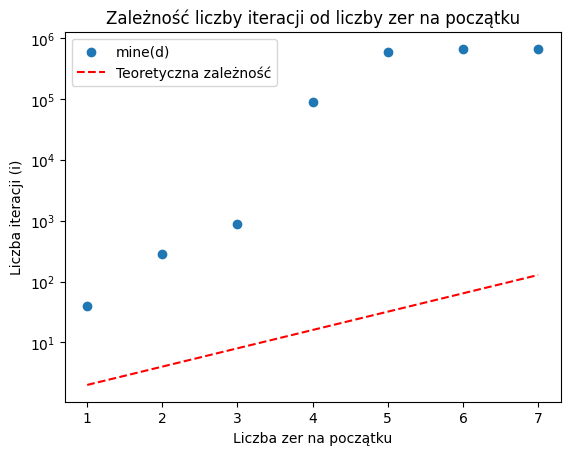

In [21]:
import matplotlib.pyplot as plt
def mine(d):
    i = 0
    while True:
        data = bytes(str(i), 'utf-8')
        hash_value = hashlib.sha256(data).hexdigest()

        if hash_value.startswith('0' * d):
            return i

        i += 1

def plot_mine_results(max_d):
    d_values = list(range(1, max_d + 1))
    i_values = [mine(d) for d in d_values]

    # Rysowanie wykresu
    plt.scatter(d_values, i_values, label='mine(d)')
    plt.yscale('symlog')  # Ustawienie skali logarytmicznej
    plt.xlabel('Liczba zer na początku')
    plt.ylabel('Liczba iteracji (i)')
    plt.title('Zależność liczby iteracji od liczby zer na początku')

    # Teoretyczna zależność (średnia ilość prób)
    theoretical_values = [2 ** d for d in d_values]
    plt.plot(d_values, theoretical_values, label='Teoretyczna zależność', linestyle='dashed', color='red')

    plt.legend()
    plt.show()

plot_mine_results(7)

Wykonaj funkcję **mine(d)** dla kilkunastu wartości $d$ i narysuj wykres **plt.scatter()** zależności **i(d)**.

Uwaga: użyj skali logarytmicznej **plt.yscale('symlog')**.

Zastanów się ile teoretycznie (średnio) należy wykonać prób aby znaleźć funkcję skrótu z $d$ zerami na początku. Narysuj na wykresie linię obrazującą tą zależność i porównaj z punktami uzyskanymi z funkcji **mine()**.

Powtórz pomiary, ale zamiast brać kolejne liczby, bierz losowe. Sprawdź czy daje to lepsze rezultaty.

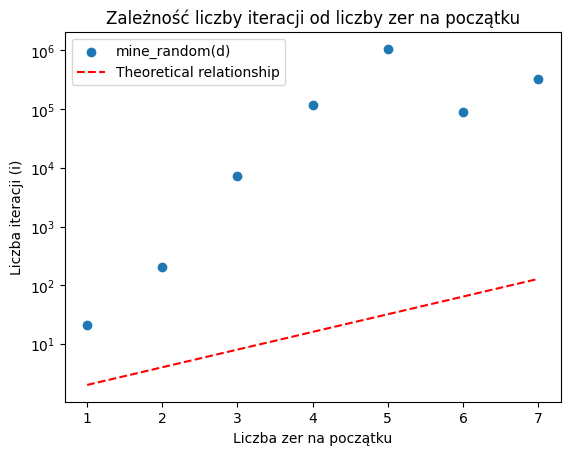

In [25]:
import hashlib
import random
import matplotlib.pyplot as plt

def mine_random(d):
    i = 0
    while True:
        random_number = random.randint(0, 1000000)
        data = bytes(str(random_number), 'utf-8')
        hash_value = hashlib.sha256(data).hexdigest()

        if hash_value.startswith('0' * d):
            return i

        i += 1

def plot_mine_results_random(max_d):
    d_values = list(range(1, max_d + 1))
    i_values = [mine_random(d) for d in d_values]

    # Plotting the results
    plt.scatter(d_values, i_values, label='mine_random(d)')
    plt.yscale('symlog')  # Set logarithmic scale
    plt.xlabel('Liczba zer na początku')
    plt.ylabel('Liczba iteracji (i)')
    plt.title('Zależność liczby iteracji od liczby zer na początku')
    # Theoretical relationship (average number of attempts)
    theoretical_values = [2 ** d for d in d_values]
    plt.plot(d_values, theoretical_values, label='Theoretical relationship', linestyle='dashed', color='red')

    plt.legend()
    plt.show()

plot_mine_results_random(7)
